# Assignment 2.1

Problem Statement -
Build a CNN for Cifar10 data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss

from keras.datasets import cifar10

import warnings
warnings.filterwarnings('ignore')

In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [19]:
print(np.unique(y_train))
print(len(y_train))

[0 1 2 3 4 5 6 7 8 9]
50000


In [20]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
labels = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat',
          4:'Deer', 5:'Dog',6:'Frog',
          7:'Horse', 8:'Ship', 9:'Truck'
        }

### Visualizing training images 

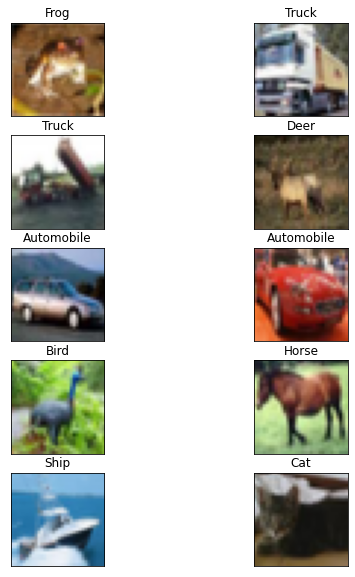

In [22]:
plt.figure(figsize=(8,10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
    
#  print(y_train[i])
plt.show()

### Normalizing images

In [23]:
x_train = x_train/255
x_test = x_test/255

In [24]:
tf.keras.backend.clear_session()

### Model Building

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax'),
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [27]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics = ["accuracy"]) 

In [28]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6756 - accuracy: 0.3983
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2855 - accuracy: 0.5610
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1398 - accuracy: 0.6198
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0623 - accuracy: 0.6497
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0386 - accuracy: 0.6636
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0382 - accuracy: 0.6676
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0423 - accuracy: 0.6706
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0585 - accuracy: 0.6698
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0703 - accuracy: 0.6663
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.107

### Model Performance

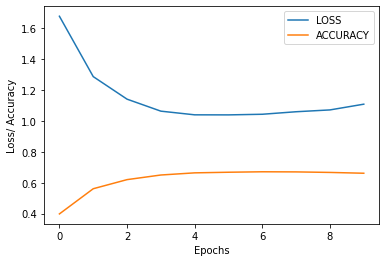

In [29]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['accuracy'], label="ACCURACY")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Accuracy')

plt.legend(loc='best')
plt.show()

In [30]:
prob = model.predict(x_test)
pred = np.argmax(prob, axis=1)

In [31]:
print(accuracy_score(y_test, pred))

0.6189


In [32]:
y_test=y_test.astype('float')
print(log_loss(y_test, prob))

1.1161344335712027


In [33]:
confusion_matrix(y_test,pred)

array([[625,  17,  50,  37,  25, 103,  16,  11,  26,  90],
       [  8, 737,   0,   6,   1,  38,   9,   1,   3, 197],
       [ 50,   2, 288,  20, 145, 338, 103,  38,   3,  13],
       [  4,   4,   6, 104,  55, 734,  50,  27,   2,  14],
       [  6,   2,  14,  22, 628, 144,  73,  96,   8,   7],
       [  1,   1,   3,  19,  46, 865,  25,  29,   1,  10],
       [  1,   5,   4,  18,  39, 186, 729,   4,   1,  13],
       [  6,   1,   0,   4,  34, 211,   7, 707,   1,  29],
       [ 71,  48,   8,  31,  10,  42,  42,   7, 640, 101],
       [ 13,  39,   1,   9,   3,  43,   9,  11,   6, 866]])

### Predictions

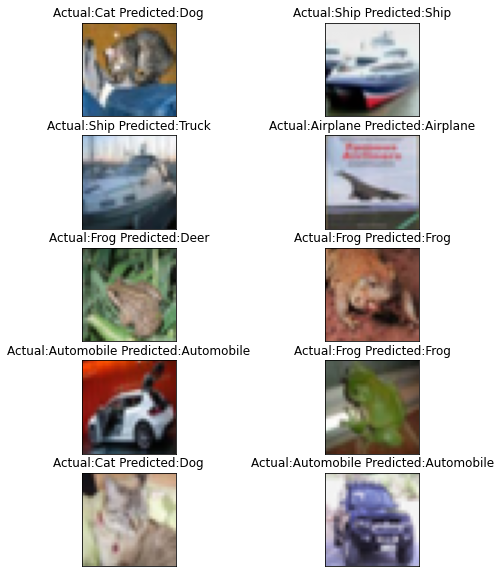

In [34]:
plt.figure(figsize=(8,10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(x_test[i])
    string = "Actual:"+ labels[y_test[i][0]] + " Predicted:" + labels[pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
    
plt.show()